EXPLORATORY ANALYSIS

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
from pathlib import Path
sys.path.append(str(Path().resolve().parent))
from config import io_config


Reference image:

287


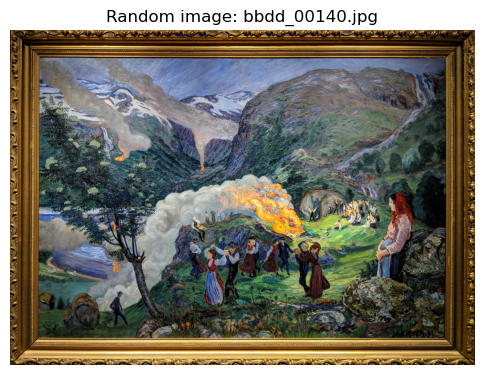

In [ ]:
IMG_IDX = 140


# Obtain db_images
db_images = sorted([p for p in io_config.DB_DIR.iterdir() if p.suffix.lower() == ".jpg"])
print(len(db_images))
random_image_path = db_images[IMG_IDX]
img = cv2.imread(str(random_image_path))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.axis("off")
plt.title(f"Random image: {random_image_path.name}")
plt.show()


**HSV ANALYSIS**

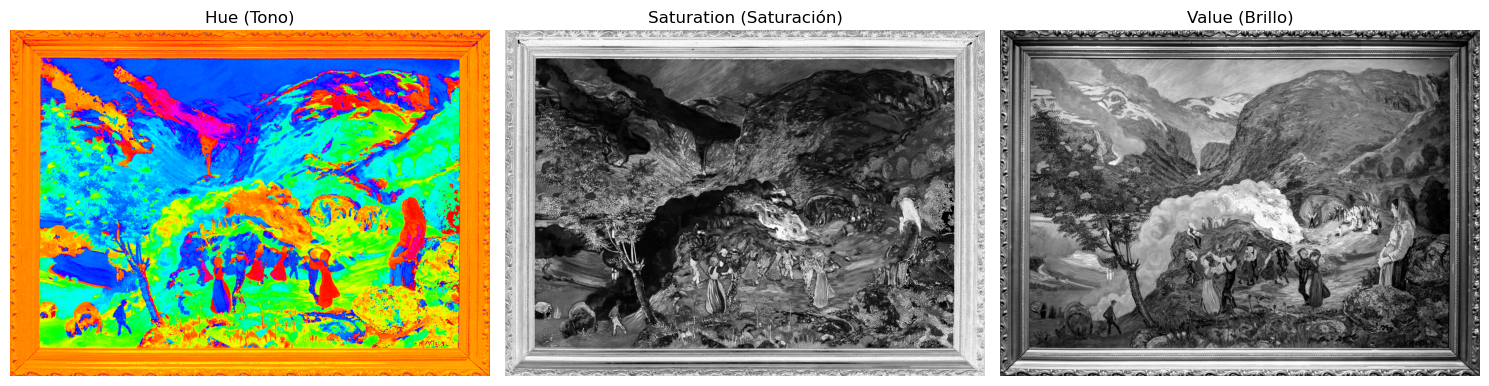

In [21]:
# To HSC
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(img_hsv)

# Show 3 channels
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(h, cmap='hsv')
axes[0].set_title("Hue (Tono)")
axes[1].imshow(s, cmap='gray')
axes[1].set_title("Saturation (Saturación)")
axes[2].imshow(v, cmap='gray')
axes[2].set_title("Value (Brillo)")
for ax in axes: ax.axis('off')
plt.tight_layout()
plt.show()


Histograms

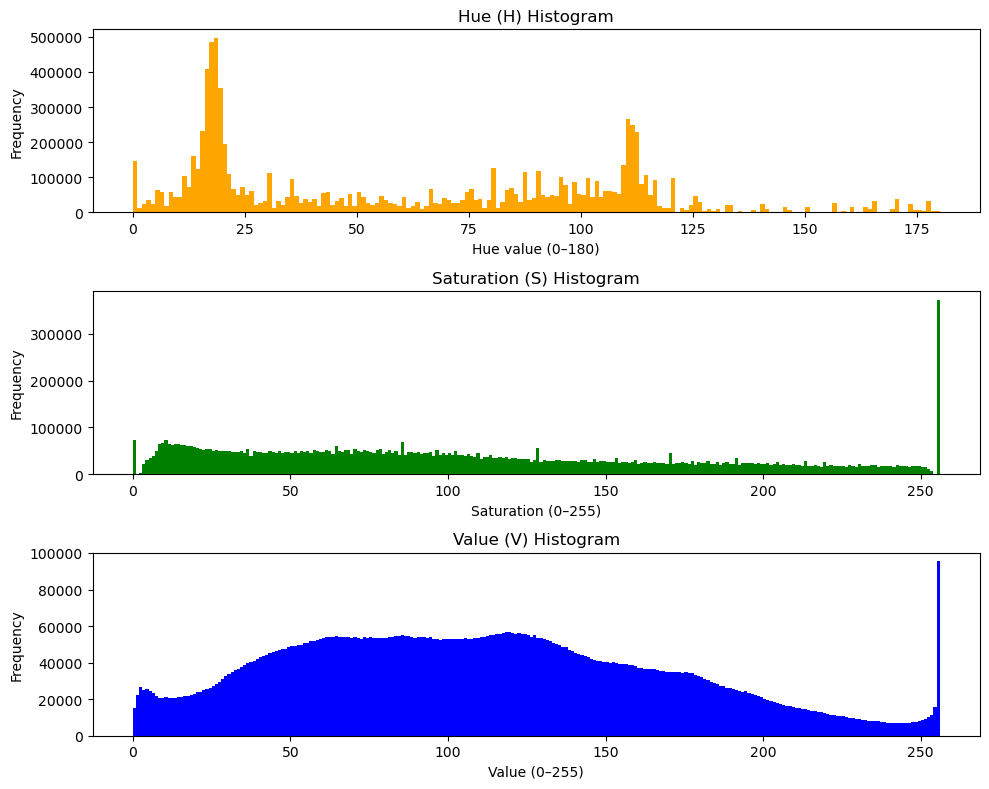

In [24]:
fig, axes = plt.subplots(3, 1, figsize=(10, 8))
# hue histogram
axes[0].hist(h.ravel(), bins=180, range=(0,180), color='orange')
axes[0].set_title('Hue (H) Histogram')
axes[0].set_xlabel('Hue value (0–180)')
axes[0].set_ylabel('Frequency')

# saturation histogram
axes[1].hist(s.ravel(), bins=256, range=(0,256), color='green')
axes[1].set_title('Saturation (S) Histogram')
axes[1].set_xlabel('Saturation (0–255)')
axes[1].set_ylabel('Frequency')

# Value histogram
axes[2].hist(v.ravel(), bins=256, range=(0,256), color='blue')
axes[2].set_title('Value (V) Histogram')
axes[2].set_xlabel('Value (0–255)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Modifications with weights

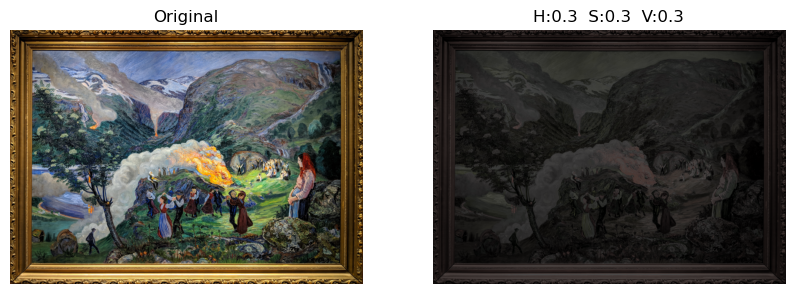

In [33]:
weights = np.array([0.3, 0.3, 0.3])  # H, S, V

# Aplicar los pesos
img_hsv_weighted = img_hsv * weights

img_hsv_weighted[...,0] = np.clip(img_hsv_weighted[...,0], 0, 179)
img_hsv_weighted[...,1:] = np.clip(img_hsv_weighted[...,1:], 0, 255)


img_bgr_weighted = cv2.cvtColor(img_hsv_weighted.astype(np.uint8), cv2.COLOR_HSV2BGR)

# Mostrar original vs ponderado
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img_bgr_weighted, cv2.COLOR_BGR2RGB))
plt.title(f"H:{weights[0]}  S:{weights[1]}  V:{weights[2]}")
plt.axis("off")

plt.show()
